# Quantum Teleportation and Superdense Coding

Before starting with these topics its useful to review one of the fundamental properties of qubits: 

- ### **Qubits in an 'unknown' state cannot be copied** (*no-cloning theorem*) 

#### <font color='red'> Exercise 1: </font>Create a classical operation that can be used to copy classical bits ($0$ or $1$)
#### <font color='red'> Exercise 2:</font> Create a quantum circuit that copies the state $\ket{+}$ (note, this is a 'known' state)

##### **Explanation for no-cloning theorem**

Let's say we have a qubit in an arbitrary state $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$ and we want to copy this. Let's say there exists an unitary operation that does this.

Thus we assume, $$U \ket{\psi} \ket{0} = \ket{\psi}\ket{\psi}$$ If such a $U$ exists, we have essentially copied the state $\ket{\psi}$ to another qubit. Let's say such a operator exists, thus we get

$$ U \ket{\psi}\ket{0} = (\alpha \ket{0} + \beta \ket{1}) (\alpha \ket{0} + \beta \ket{1})= (\alpha^ 2 \ket{00} + \alpha \beta \ket{01} + \beta \alpha \ket{10}+ \beta^2 \ket{11})$$

Also when we use $U$ to clone the expansion of $\ket{\psi}$ we see,

$$ U \ket{\psi}\ket{0} = U (\alpha \ket{0} \ket{0}) + U (\beta \ket{1} \ket{0}) = \alpha \ket{0} \ket{0} + \beta \ket{1} \ket{1}$$

Comparing the two resulting states above, we can see that they are different (there are no cross-terms in the second state). We get a contradiction and thus we cannot construct such a unitary operator $U$. 

## Quantum Teleportation

(Extracted as it is from Nielsen and Chuan, 2010)

*Quantum teleportation is a technique for moving quantum states around, even in the absence of a quantum communications channel linking the sender of the quantum state to the recipient.*

**Here’s how it works:** 

Alice and Bob met long ago but now live far apart. While together they generated an EPR pair (refer PS(05)), each taking one qubit of the EPR pair when they separated. Many years later, Bob is in hiding, and Alice’s mission is to deliver an arbitrary qubit $\ket{\psi}$ to Bob. She does not know the state of the qubit, and moreover can only send classical information to Bob.
 
Intuitively, things look pretty bad for Alice. She doesn’t know the state $\ket{\psi}$ of the qubit she has to send to Bob, and the laws of quantum mechanics prevent her from determining the state when she only has a single copy of $\ket{\psi}$ in her possession. (<font color='red'> WHY? </font>) What’s worse, even if she did know the state $\ket{\psi}$, describing it precisely takes an infinite amount of classical information since $\ket{\psi}$ takes values in a continuous space. So even if she did know $\ket{\psi}$, it would take forever for Alice to describe the state to Bob.  

Fortunately for Alice, quantum teleportation is a way of utilizing the entangled EPR pair in order to send $\ket{\psi}$ to Bob, with only a small overhead of classical communication.

**Teleportation protocol:**


- Suppose Alice and Bob already share an EPR pair (Alice has the first qubit and Bob has the second qubit of the EPR pair). The state of the EPR pair is:

    $$ \ket{\psi} = \frac{\ket{00} + \ket{11}}{\sqrt{2}}$$


- Alice wants to send the quantum message (encoded by a qubit), 
$$ \ket{v} = \begin{pmatrix} 
 \alpha\\\beta 
 \end{pmatrix} = \alpha \ket{0} + \beta \ket{1} $$

So there are three qubits in total, two belonging to the EPR pair and one corresponding to the message to be sent. Alice has $2$ qubits and Bob has $1$. The goal is to send $\ket{\psi}$ to Bob.

Thus to begin with, the full quantum state of the three qubits between Alice and Bob is (note, first $2$ qubits are with Alice and the third qubit is with Bob)

$$= \big (\alpha \ket{0} + \beta \ket{1}\big) \big(\frac {\ket{00} + \ket{11}}{\sqrt{2}} \big) = \frac {\big( \alpha \ket{000} + \alpha \ket{011} + \beta \ket{100} + \beta \ket{111} \big)}{\sqrt{2}}


- Alice applies a $CNOT$ gate with the message qubit as the control and her qubit of the EPR pair as the target. The resulting state now is, 

$$ = \frac {\big( \alpha \ket{000} + \alpha \ket{011} + \beta \ket{110} + \beta \ket{101} \big)}{\sqrt{2}}$$ 
This can also be written as follows: 
$$ = \frac {\alpha \ket{0} \big( \ket{00} + \ket{11} \big) + \beta \ket{1} \big( \ket{10} + \ket{01} \big)}{\sqrt{2}}$$ 


- She then applies a Hadamard gate to the message qubit (the first qubit).

$$ = \frac {\alpha \big (\ket{0} + \ket{1})  \big( \ket{00} + \ket{11} \big) + \beta \big (\ket{0} - \ket{1})  \big( \ket{10} + \ket{01} \big)}{2}$$ 

Simple regrouping of terms leads to the state being rewritten as: (<font color='red'> Check! </font>) 

$$ =\frac{\ket{00}\big(\alpha \ket{0} + \beta \ket{1} \big) + \ket{01}\big(\alpha \ket{1} + \beta \ket{0} \big)+ \ket{10}\big(\alpha \ket{0} - \beta \ket{1} \big) + \ket{11}\big(\alpha \ket{1} - \beta \ket{0} \big)}{2}$$

In this expression, first term has Alice's qubits is $\ket{00}$ and Bob's qubit in state $\alpha \ket{0} + \beta \ket{1}$ which is exactly the message to be sent. Similarly the other terms can be interpreted. (note in the rest of the terms, Bob's state need to be manipulated to retrieve the original message)

- Alice performs measurement on both of her qubits. She can get any of the four computational basis states each with probability $\frac{1}{4}$.

Depeding on the measurement outcomes, Bob's qubit is in the following states:

1. "00":  $ \ket{v_{00}} = \alpha \ket{0} + \beta \ket{1} $
2. "01":  $ \ket{v_{01}} = \alpha \ket{1} + \beta \ket{0} $
3. "10":  $ \ket{v_{10}} =  \alpha \ket{0} - \beta \ket{1} $
4. "11":  $ \ket{v_{11}} =  \alpha \ket{1} - \beta \ket{0} $

- The measurement results is then sent to Bob using $2$ classical bits $ (M_1,M_2) $, via a classical communication channel. 

For each $ (M_1,M_2)  $ pair, Bob has to apply appropriate quantum operator(s) to retrieve the state $ \ket{\psi} = \alpha \big(\ket{0} + \beta \ket{1}\big) $.

- If $(M_1,M_2) = (0,0)$, Bob need not do anything.
- If $(M_1,M_2)  = (0,1)$, Bob applies a NOT gate to retrieve the state.
- If $(M_1,M_2)  = (1,0)$, Bob applies a ___ gate to retrieve the state.
- If $(M_1,M_2)  = (1,1)$, Bob applies __ and a __ gate (necessarily in the same order- <font color='red'> Why does the order matter? </font>) to retrieve the state.  
(<font color='red'> fill in the blanks </font>)

![Teleportation Protocol](Images/Teleportation.png)

#### Implementing the Quantum Teleportation Protocol

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and two bits (first qubit state is to be sent from Alice to Bob)
q =  QuantumRegister(3,"q")
c1 = ClassicalRegister(1,"c1")
c2 = ClassicalRegister(1,"c2")
c3 = ClassicalRegister(1,"c3")
qc = QuantumCircuit(q,c1,c2,c3)

# rotate the first qubit by random angle ( this resulting random state is to be sent to Bob); Preparing a state to be sent to Bob
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")

qc.ry(2*theta,q[2])    # the state of q[2] qubit is to be sent to Bob

# creating an entanglement between q[1] and q[0] 
qc.h(q[1])
qc.cx(q[1],q[0])

# CNOT operator by Alice on her qubits where q[2] is the control qubit
qc.cx(q[2],q[1])

# Hadamard operator by Alice on q[2]
qc.h(q[2])

qc.barrier()

# the measurement done by Alice on her qubits
qc.measure(q[2],c2)
qc.measure(q[1],c1)

qc.barrier()

# post-processing done by Bob to retrieve the state of q[2]
qc.x(q[0]).c_if(c1,1)
qc.z(q[0]).c_if(c2,1)

qc.measure(q[0], c3)   # if the teleportation protocol is correctly done, the histogram results for the state of q[0] must match the state to be sent 
# draw the circuit
display(qc.draw(output='mpl', reverse_bits=True))


from qiskit.visualization import plot_histogram

# Execute the circuit on the qasm simulator
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=50000)
counts = job.result().get_counts(qc)
print(counts)


# Initialize dictionaries to store counts for the third qubit (q[0]) being 0 and 1
counts_bit_0 = {}
counts_bit_1 = {}

# Iterate through the counts dictionary
for state, count in counts.items():
    # Split the state string into bits
    bits = state.split()
    # print(bits)
    # Extract the third bit
    third_bit = bits[0]
    # Add the count to the corresponding dictionary based on the third bit value
    if third_bit == '0':
        counts_bit_0[state] = count
    elif third_bit == '1':
        counts_bit_1[state] = count

# Sum the counts for each dictionary
total_counts_bit_0 = sum(counts_bit_0.values())
total_counts_bit_1 = sum(counts_bit_1.values())

# Create a dictionary to hold the counts for the third bit being 0 and 1
result_counts = {'0': total_counts_bit_0, '1': total_counts_bit_1}

print(result_counts)

# Plot the histogram for the specific qubit
plot_histogram(result_counts)


the picked angle is 291.6 degrees and 5.089380098815465 radians


MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

c:\Users\viraj.dsouza\OneDrive - Plaksha University\Main\PlakshaQC\qcvenv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


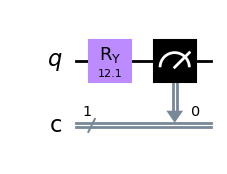

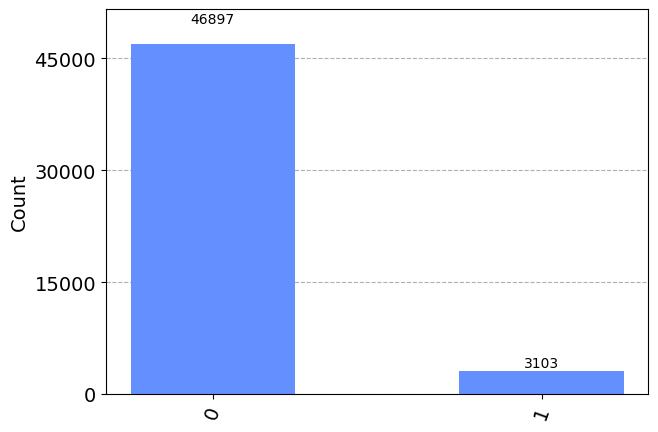

In [ ]:
# Drawing the histogram for the qubit state to be sent (angle has been copied from the previous code block where the angle was randomly generated)

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# quantum circuit with three qubits and two bits (first qubit state is to be sent from Alice to Bob)
q =  QuantumRegister(1,"q")
c= ClassicalRegister(1,"c")

qc_check = QuantumCircuit(q,c)

theta= 6.031857894892402
qc_check.ry(2*theta,q[0])
qc_check.measure(q[0], c[0])

display(qc_check.draw(output='mpl'))

job = execute(qc_check, Aer.get_backend('qasm_simulator'), shots=50000)
counts = job.result().get_counts(qc_check)

from qiskit.visualization import plot_histogram
plot_histogram(counts)


#### Clearly, the histogram is very similar, hence our protocol is correct. Bob has received the state sent by Alice through two classical bits

T*he following snippet has been taken from Nielsen and Chuang (2010). It speaks about the applications of teleportation as well as some interesting features of teleportation that seemingly look like violation of faster than light travel and the no cloning theorem. Please go through this.*

![Teleportation](Images/TelportNC.png)

## Superdense Coding

Suppose 'Alice' and 'Bob' share a pair of qubits in the entangled state. Alice's goal is to share $2$ classical bits of information to Bob, but is only allowed to send a single qubit. Superdense Coding allows for such an information transfer.

![Superdense_coding](Images/Superdense_coding.png)

**Superdense Coding Protocol:**

- Suppose Alice and Bob already share an EPR pair (Alice has the first qubit and Bob has the second qubit of the EPR pair). The state of the EPR pair is:

    $$ \ket{\psi} = \frac{\ket{00} + \ket{11}}{\sqrt{2}}$$

- Alice has two bits of classical information: $ b_1,b_2 \in \{0,1\} $ which she wishes to send to Bob.
There are four possible values for the pair $ (b_1,b_2) $:  $ (0,0), (0,1), (1,0) or (1,1) $.

- If $b_1$ is 1, then Alice applies x-gate (NOT operator) to her qubit.

- If $b_2$ is 1, then Alice applies z-gate to her qubit.

- After these operations, Alice sends her qubit to Bob. After the communication, Bob now has both qubits.

- Bob applies cx-gate (CNOT operator), where Alice's qubit is the control qubit.

- Bob applies h-gate (Hadamard operator) to Alice's qubit.

- Bob measures both qubits.

The measurement result will be exactly $ (b_1,b_2) $.

*Thus via the communication of $1$ qubit between Alice and Bob, $2$ classical bits have been transferred.*

c:\Users\viraj.dsouza\OneDrive - Plaksha University\Main\PlakshaQC\qcvenv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


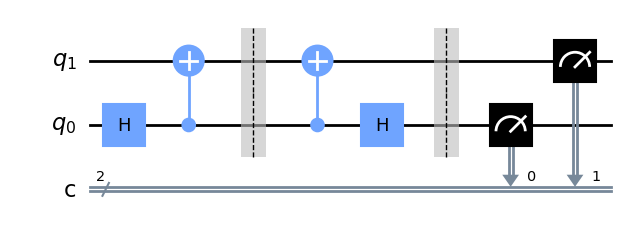

00 --> {'00': 100}


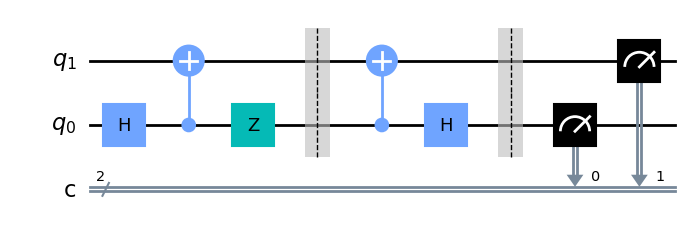

01 --> {'01': 100}


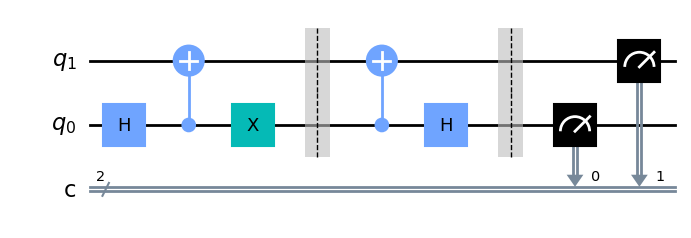

10 --> {'10': 100}


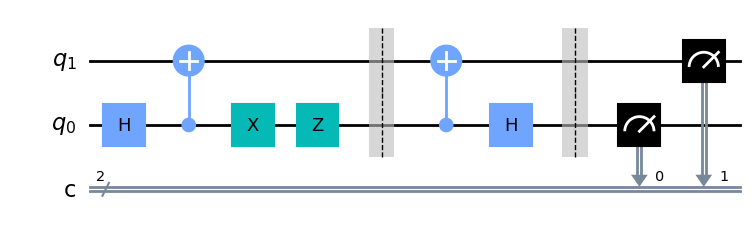

11 --> {'11': 100}


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

classical_bits = ['00','01','10','11']  

for pair in classical_bits:

    # create a quantum curcuit with two qubits: Alice's qubit is q[0] here and Bob's qubit is q[1].
    q = QuantumRegister(2,"q") 
    c = ClassicalRegister(2,"c") 
    qc = QuantumCircuit(q,c)

    # Entangling Alice's and Bob's qubit
    qc.h(q[0])
    qc.cx(q[0],q[1])

    # if b_1 is 1, Alice applies x-gate to her qubit
    if pair[0]=='1':
        qc.x(q[0])

    # if b_2 is 1, Alice applies z-gate to her qubit
    if pair[1]=='1':
        qc.z(q[0])

    # Alice sends her qubit to Bob
    qc.barrier()   #this is just for better visualization of circuit, shown by dotten lines 

    #  apply cx-gate as CNOT(Alice's qubit,Bob's qubit)
    qc.cx(q[0],q[1])

    # apply h-gate (Hadamard) to the Alice's qubit
    qc.h(q[0])

    # measure both qubits
    qc.barrier()
    qc.measure(q,c)

    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))

    # compare the results with pair (b_1,b_2)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

##### <font color='red'> Imp Exercise: Show that the four resulting two qubit states after the first barrier in the four quantum circuits shown above are exactly the four Bell states</font>

*Bell states form an orthonormal basis for $2$ qubit states, and can therefore be distinguished by an appropriate quantum measurement.*

If Alice sends her qubit to Bob, giving Bob possession of both qubits, then by doing a measurement in the Bell basis
Bob can determine which of the four possible bit strings Alice sent.This is the key idea involved in superdense coding (hope you are able to convince this to yourself!!)

**Key insight that can be seen through this notebook:** 

<font color='yellow'>Information is physical, and surprising physical theories such as quantum mechanics may predict surprising information processing abilities.</font>

Experimental realization of Superdense coding can be found in this reference:
https://courses.physics.illinois.edu/phys513/sp2016/reading/week9/Dense_coding_Zeilinger1996.pdf


### References:

- QWorld resources available at https://gitlab.com/qworld/qeducation/qbook101
- Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press.
- K. Mattle, H. Weinfurter, P. G. Kwiat, and A. Zeilinger. Dense coding in experimental quantum communication. Phys. Rev. Lett., 76(25):4656–4659, 1996